In [175]:
# This code explores the data and answers certain questions 
# from a given task in this learning project.

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go

df = pd.read_csv('202012-capitalbikeshare-tripdata.csv')

In [176]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C04E20007D039277,docked_bike,2020-12-02 09:10:36,2020-12-02 09:24:12,18th St & Wyoming Ave NW,31114.0,18th St & Pennsylvania Ave NW,31242.0,38.918809,-77.041571,38.899680,-77.041539,casual
1,A488C0D9F4761D06,classic_bike,2020-12-31 12:46:29,2020-12-31 14:01:07,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
2,9E7E97A927A85552,classic_bike,2020-12-31 12:47:03,2020-12-31 14:01:04,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual


In [177]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [178]:
# How many different bike types and how many bikes per type does
# Capital Bikeshare provide?

df.rideable_type.value_counts()

classic_bike     48656
docked_bike      28924
electric_bike    28249
Name: rideable_type, dtype: int64

<AxesSubplot:>

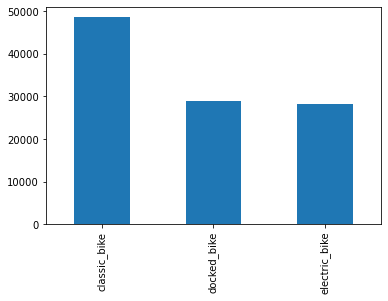

In [179]:
df.rideable_type.value_counts().plot(kind = 'bar')

In [180]:
# Which 25 stations are most popular to start a bike ride (in December 2020)? 

ride_start = df.start_station_name.value_counts()
ride_start = ride_start.sort_values(ascending = False).head(25)
ride_start = ride_start.sort_values(ascending = True)
#ride_start = ride_start.sort_values(ascending = True).plot(kind='barh')
ride_start1 = pd.DataFrame(ride_start).reset_index()
ride_start1.columns = ['start_station_name', 'rides']
ride_start1

,start_station_name,rides
0,20th St & Florida Ave NW,649
1,14th & Belmont St NW,663
2,3rd & M St NE,663
3,14th & R St NW,667
4,16th & Harvard St NW,668
5,Columbus Circle / Union Station,698
6,Adams Mill & Columbia Rd NW,709
7,Massachusetts Ave & Dupont Circle NW,709
8,5th & K St NW,723
9,17th & Corcoran St NW,730


In [181]:
fig_start = px.bar(ride_start1, x = 'rides', y = 'start_station_name')
fig_start.update_xaxes(
    title_text = 'Rides',
    showline = False, showgrid = False
    )
fig_start.update_yaxes(
    title_text = 'Start Station'
    )
fig_start.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig_start.show()

In [182]:
# Which 25 stations are most popular to end a bike ride? 

ride_end = df.end_station_name.value_counts()
#ride_end.sort_values(ascending = False).head(25).plot(kind='barh')
ride_end = ride_end.sort_values(ascending = False).head(25)
ride_end = ride_end.sort_values(ascending = True)
#ride_start = ride_start.sort_values(ascending = True).plot(kind='barh')
ride_end1 = pd.DataFrame(ride_end).reset_index()
ride_end1.columns = ['end_station_name', 'rides']
ride_end1

,end_station_name,rides
0,Henry Bacon Dr & Lincoln Memorial Circle NW,659
1,Lincoln Memorial,672
2,20th St & Florida Ave NW,682
3,7th & F St NW / National Portrait Gallery,684
4,New Hampshire Ave & Ward Pl NW,684
5,1st & K St SE,690
6,4th St & Madison Dr NW,698
7,5th & K St NW,730
8,3rd & M St NE,744
9,11th & M St NW,748


In [183]:
fig_end = px.bar(ride_end1, x = 'rides', y = 'end_station_name')
fig_end.update_xaxes(
    title_text = 'Rides',
    showline = False, showgrid = False
    )
fig_end.update_yaxes(
    title_text = 'End Station'
    )
fig_end.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig_end.show()

In [184]:
# This creates a dataframe with the 25 most popular start and end stations for bike rides.

ride_start = df.start_station_name.value_counts().nlargest(25,'all')
ride_end = df.end_station_name.value_counts().nlargest(25,'all')
ride_end = pd.DataFrame(ride_end)
ride_end.reset_index(inplace=True)
ride_end.rename(columns = {'index':'Ride End', 'end_station_name':'End Sum'}, inplace = True) 
top_stations = ride_start.copy()
top_stations = pd.DataFrame(top_stations)
top_stations.reset_index(inplace=True)
top_stations.rename(columns = {'index':'Ride Start', 'start_station_name':'Start Sum'}, inplace = True) 
top_stations['Ride End'] = ride_end['Ride End']
top_stations['End Sum'] = ride_end['End Sum']
top_stations.head(3)
#top_stations.plot(kind='barh')

,Ride Start,Start Sum,Ride End,End Sum
0,New Hampshire Ave & T St NW,1308,15th & P St NW,1339
1,15th & P St NW,1155,New Hampshire Ave & T St NW,1316
2,14th & Irving St NW,1046,1st & M St NE,992


In [185]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C04E20007D039277,docked_bike,2020-12-02 09:10:36,2020-12-02 09:24:12,18th St & Wyoming Ave NW,31114.0,18th St & Pennsylvania Ave NW,31242.0,38.918809,-77.041571,38.899680,-77.041539,casual
1,A488C0D9F4761D06,classic_bike,2020-12-31 12:46:29,2020-12-31 14:01:07,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
2,9E7E97A927A85552,classic_bike,2020-12-31 12:47:03,2020-12-31 14:01:04,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual


In [186]:
# The station data appears to have multiple slightly different entries for latitude and longitude. 
# This code part takes reduces all specific station information to a dataframe without duplicates.

df_unique_addresses = df.copy()
df_unique_addresses = df_unique_addresses[['start_station_name', 'start_station_id', 'start_lat', 'start_lng']]
df_unique_addresses = df_unique_addresses.drop_duplicates(subset=['start_station_id'], ignore_index=True)
df_unique_addresses

,start_station_name,start_station_id,start_lat,start_lng
0,18th St & Wyoming Ave NW,31114.0,38.918809,-77.041571
1,Potomac & Pennsylvania Ave SE,31606.0,38.880300,-76.986200
2,Wakefield High School,31054.0,38.847129,-77.112550
3,Washington-Liberty High School / N Stafford St...,31920.0,38.888282,-77.111066
4,3rd St & Pennsylvania Ave SE,31269.0,38.887378,-77.001955
...,...,...,...,...
606,Baltimore Ave & Van Buren St / Riverdale Park ...,32402.0,38.969581,-76.937349
607,47th & Elm St,32021.0,38.982456,-77.091991
608,Greensboro & International Dr,32221.0,38.922864,-77.227679
609,New Dominion Pkwy & Fountain Dr,32212.0,38.960574,-77.356324


In [187]:
# Building a dataframe with only the necessary information for the 25 top start stations

df_main_start_stations_id = df['start_station_id'].value_counts().nlargest(25,'all')
df_main_start_stations = df['start_station_name'].value_counts().nlargest(25,'all')
df_main_start_stations_id = pd.DataFrame(df_main_start_stations_id)
df_main_start_stations = pd.DataFrame(df_main_start_stations)
df_main_start_stations_id.reset_index(inplace=True)
df_main_start_stations.reset_index(inplace=True)
df_main_start_stations.columns = ['start_station', 'start_count']
df_main_start_stations_id.columns = ['start_station_id', 'start_count']
df_main_start_stations['station_id'] = df_main_start_stations_id.start_station_id
df_main_start_stations.head(3)

,start_station,start_count,station_id
0,New Hampshire Ave & T St NW,1308,31229.0
1,15th & P St NW,1155,31201.0
2,14th & Irving St NW,1046,31124.0


In [188]:
# for j in df_main_start_stations.station_id:
#     print(j, df_main_start_stations[df_main_start_stations['station_id'] == j])

In [189]:
# Looking for NaN values and getting rid of them

print(df_unique_addresses[df_unique_addresses['start_station_id'].isnull() == True])

    start_station_name  start_station_id  start_lat  start_lng
284                NaN               NaN      38.89     -77.04


In [190]:
df_unique_addresses = df_unique_addresses.dropna()
df_unique_addresses.shape

(610, 4)

In [191]:
# Correcting the multiple different entries for latitude and longitude per station 
# by inserting this values from the straightened dataframe df_unique_addresses

df_lat = []
df_long = []
df_stat_id = []
for j in df_main_start_stations.station_id:
    for i in range(len(df_unique_addresses)):
        if j == float(df_unique_addresses.start_station_id.iloc[i]):
            df_lat.append(df_unique_addresses['start_lat'][i])
            df_long.append(df_unique_addresses['start_lng'][i])
            df_stat_id.append(df_unique_addresses['start_station_id'][i])

In [192]:
df_lat = pd.DataFrame(df_lat)
df_long = pd.DataFrame(df_long)
df_stat_id = pd.DataFrame(df_stat_id)
df_test = df_stat_id
df_test['lat'] = df_lat
df_test['lon'] = df_long
df_test.columns = ['id', 'lat', 'lon']
df_test.columns

Index(['id', 'lat', 'lon'], dtype='object')

In [193]:
df_main_start_stations['lat'] = df_test.lat
df_main_start_stations['lon'] = df_test.lon

In [194]:
# This is the result: a dataframe with unified latitude and longitude values

df_main_start_stations.head(3)

,start_station,start_count,station_id,lat,lon
0,New Hampshire Ave & T St NW,1308,31229.0,38.915544,-77.038252
1,15th & P St NW,1155,31201.0,38.888255,-77.049437
2,14th & Irving St NW,1046,31124.0,38.928552,-77.032224


In [195]:
# This is how the top start stations are distributed 

fig = px.scatter_mapbox(df_main_start_stations,
                    lat='lat',
                    lon='lon',
                    hover_name="start_station",
                    color_discrete_sequence=['red'],
                    zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [196]:
# This was supposed to become a dataframe / map plot with top start and end stations combined 

ride_start1 = df.start_station_name.value_counts().nlargest(25,'all')
ride_end1 = df.end_station_name.value_counts().nlargest(25,'all')
ride_end1 = pd.DataFrame(ride_end1)
ride_end1.reset_index(inplace=True)
ride_end1['Start or End'] = 1
ride_end1.rename(columns = {'index':'Station', 'end_station_name':'Sum'}, inplace = True) 

top_stations1 = ride_start1.copy()
top_stations1 = pd.DataFrame(top_stations1)
top_stations1['Start or End'] = 0
top_stations1.reset_index(inplace=True)
top_stations1.rename(columns = {'index':'Station', 'start_station_name':'Sum'}, inplace = True)
top_stations1 = top_stations1.append(ride_end1)

# top_stations.rename(columns = {'index':'Ride Start', 'start_station_name':'Start Sum'}, inplace = True) 
# top_stations['Ride End'] = ride_end['Ride End']
# top_stations['End Sum'] = ride_end['End Sum']


In [197]:
top_stations1

,Station,Sum,Start or End
0,New Hampshire Ave & T St NW,1308,0
1,15th & P St NW,1155,0
2,14th & Irving St NW,1046,0
3,1st & M St NE,895,0
4,11th & M St NW,879,0
5,8th & O St NW,856,0
6,Lincoln Memorial,826,0
7,Jefferson Dr & 14th St SW,798,0
8,14th & V St NW,798,0
9,4th & M St SW,797,0


In [198]:
# lat and lon must be added!!!

# fig = px.scatter_mapbox(top_stations1,
#                     lat='lat',
#                     lon='lon',
#                     hover_name="street",
#                     zoom=9,
#                     size='sum',
#                     color = top_stations1['Start or End'])
# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [199]:
# And now a few explorations of timeseries possibilities...

pd.to_datetime(df.started_at, yearfirst=True)
pd.to_datetime(df.ended_at, yearfirst=True)

0        2020-12-02 09:24:12
1        2020-12-31 14:01:07
2        2020-12-31 14:01:04
3        2020-12-29 14:12:22
4        2020-12-27 12:36:12
                 ...        
105824   2020-12-12 14:17:02
105825   2020-12-03 14:06:11
105826   2020-12-06 08:03:46
105827   2020-12-21 14:26:59
105828   2020-12-18 09:23:54
Name: ended_at, Length: 105829, dtype: datetime64[ns]

In [200]:
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    11054
start_station_id      11054
end_station_name      12259
end_station_id        12259
start_lat                 0
start_lng                 0
end_lat                 204
end_lng                 204
member_casual             0
dtype: int64

In [201]:
df.shape

(105829, 13)

In [202]:
df = df.dropna()
df.shape

(89908, 13)

In [203]:
df['start_date'] = pd.to_datetime(df['started_at']).dt.date
df['start_time'] = pd.to_datetime(df['started_at']).dt.time
df['end_date'] = pd.to_datetime(df['ended_at']).dt.date
df['end_time'] = pd.to_datetime(df['ended_at']).dt.time
pd.to_datetime(df.start_date, yearfirst=True)
pd.to_datetime(df.end_date, yearfirst=True)

0        2020-12-02
1        2020-12-31
2        2020-12-31
3        2020-12-29
4        2020-12-27
            ...    
105824   2020-12-12
105825   2020-12-03
105826   2020-12-06
105827   2020-12-21
105828   2020-12-18
Name: end_date, Length: 89908, dtype: datetime64[ns]

In [204]:
d = pd.Series(df.start_date.unique())
d.sort_values()

28    2020-12-01
0     2020-12-02
13    2020-12-03
10    2020-12-04
11    2020-12-05
6     2020-12-06
9     2020-12-07
19    2020-12-08
12    2020-12-09
26    2020-12-10
8     2020-12-11
5     2020-12-12
4     2020-12-13
30    2020-12-14
22    2020-12-15
20    2020-12-16
15    2020-12-17
29    2020-12-18
17    2020-12-19
23    2020-12-20
24    2020-12-21
16    2020-12-22
18    2020-12-23
25    2020-12-24
14    2020-12-25
21    2020-12-26
3     2020-12-27
7     2020-12-28
2     2020-12-29
27    2020-12-30
1     2020-12-31
dtype: object

In [205]:
# This data comparison shows (among other things) 
# that some rides end before they even started...

d = pd.Series(df.end_date.unique())
d.sort_values()

30    2020-11-25
34    2020-11-26
28    2020-12-01
0     2020-12-02
13    2020-12-03
10    2020-12-04
11    2020-12-05
6     2020-12-06
9     2020-12-07
18    2020-12-08
12    2020-12-09
26    2020-12-10
8     2020-12-11
5     2020-12-12
4     2020-12-13
31    2020-12-14
22    2020-12-15
19    2020-12-16
15    2020-12-17
29    2020-12-18
17    2020-12-19
23    2020-12-20
24    2020-12-21
20    2020-12-22
16    2020-12-23
25    2020-12-24
14    2020-12-25
21    2020-12-26
3     2020-12-27
7     2020-12-28
2     2020-12-29
27    2020-12-30
1     2020-12-31
32    2021-01-01
33    2021-01-02
35    2021-01-03
dtype: object

In [206]:
df[df.start_date > df.end_date].count()

ride_id               457
rideable_type         457
started_at            457
ended_at              457
start_station_name    457
start_station_id      457
end_station_name      457
end_station_id        457
start_lat             457
start_lng             457
end_lat               457
end_lng               457
member_casual         457
start_date            457
start_time            457
end_date              457
end_time              457
dtype: int64

In [207]:
df[df.start_date > df.end_date].head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time
157,E34D3961C1866FAC,docked_bike,2020-12-15 12:50:52,2020-11-25 15:28:23,14th & Irving St NW,31124.0,4th & W St NE,31500.0,38.928552,-77.032224,38.919077,-77.000648,member,2020-12-15,12:50:52,2020-11-25,15:28:23
619,45000D794C7B16FF,docked_bike,2020-12-15 12:56:37,2020-11-25 16:27:25,4th & East Capitol St NE,31618.0,Columbus Circle / Union Station,31623.0,38.889955,-77.000349,38.896960,-77.004930,member,2020-12-15,12:56:37,2020-11-25,16:27:25
654,6603379E602558B9,docked_bike,2020-12-15 12:47:26,2020-11-25 14:27:15,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879476,-77.114563,38.879477,-77.114563,casual,2020-12-15,12:47:26,2020-11-25,14:27:15


In [208]:
# Keep only the data where bike trips end after they were started

df = df[df.start_date <= df.end_date]

In [209]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,89451.000000,89451.000000,89451.000000,89451.000000,89451.000000,89451.000000
mean,31361.104169,31362.615488,38.904975,-77.031828,38.903835,-77.031545
std,253.366143,252.296913,0.026624,0.031253,0.026284,0.030948
min,31000.000000,31000.000000,38.782633,-77.363094,38.782633,-77.363094
25%,31202.000000,31205.000000,38.892220,-77.044400,38.892244,-77.044467
50%,31275.000000,31273.000000,38.903819,-77.032096,38.903533,-77.032008
75%,31605.000000,31605.000000,38.916442,-77.015289,38.914204,-77.015289
max,32901.000000,32901.000000,39.123513,-76.825535,39.123513,-76.825535


In [210]:
df.started_at = pd.to_datetime(df.started_at)
df.ended_at = pd.to_datetime(df.ended_at)

In [211]:
df.ended_at

0        2020-12-02 09:24:12
1        2020-12-31 14:01:07
2        2020-12-31 14:01:04
3        2020-12-29 14:12:22
4        2020-12-27 12:36:12
                 ...        
105824   2020-12-12 14:17:02
105825   2020-12-03 14:06:11
105826   2020-12-06 08:03:46
105827   2020-12-21 14:26:59
105828   2020-12-18 09:23:54
Name: ended_at, Length: 89451, dtype: datetime64[ns]

In [212]:
#df = df.drop('index', axis = 1)
df.reset_index(drop = True, inplace = True)
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time
0,C04E20007D039277,docked_bike,2020-12-02 09:10:36,2020-12-02 09:24:12,18th St & Wyoming Ave NW,31114.0,18th St & Pennsylvania Ave NW,31242.0,38.918809,-77.041571,38.899680,-77.041539,casual,2020-12-02,09:10:36,2020-12-02,09:24:12
1,A488C0D9F4761D06,classic_bike,2020-12-31 12:46:29,2020-12-31 14:01:07,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual,2020-12-31,12:46:29,2020-12-31,14:01:07
2,9E7E97A927A85552,classic_bike,2020-12-31 12:47:03,2020-12-31 14:01:04,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual,2020-12-31,12:47:03,2020-12-31,14:01:04


In [213]:
# Extracting the weekday from the timestamp and adding it to df

weekday = []
for i in range(len(df)):
    weekday.append(df['started_at'][i].day_name())

weekday = pd.DataFrame(weekday)
weekday.rename(columns = {0:'weekday'}, inplace = True)

df = pd.concat([df, weekday], axis = 1)

In [214]:
df = df.sort_values(by=['started_at', 'ended_at'])

In [215]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,weekday
64251,4269E58FC83E91AA,docked_bike,2020-12-01 00:02:29,2020-12-01 00:16:37,Connecticut & Nebraska Ave NW,31310.0,Columbia Rd & Belmont St NW,31113.0,38.955016,-77.069956,38.920669,-77.043680,member,2020-12-01,00:02:29,2020-12-01,00:16:37,Tuesday
86931,1894D51DDCE6F69D,docked_bike,2020-12-01 00:05:07,2020-12-01 00:20:11,17th & K St NW / Farragut Square,31233.0,8th & H St NW,31228.0,38.902061,-77.038322,38.899700,-77.023086,member,2020-12-01,00:05:07,2020-12-01,00:20:11,Tuesday
14388,D9996DB185E58CA8,docked_bike,2020-12-01 00:07:14,2020-12-01 00:24:17,Wisconsin Ave & O St NW,31312.0,15th St & Constitution Ave NW,31321.0,38.908490,-77.063586,38.892244,-77.033234,member,2020-12-01,00:07:14,2020-12-01,00:24:17,Tuesday


In [216]:
# The following map shows the top 50 roundtrip stations, that is stations where customers love to start AND end a trip

df[df.start_station_name == df.end_station_name].count()

ride_id               6983
rideable_type         6983
started_at            6983
ended_at              6983
start_station_name    6983
start_station_id      6983
end_station_name      6983
end_station_id        6983
start_lat             6983
start_lng             6983
end_lat               6983
end_lng               6983
member_casual         6983
start_date            6983
start_time            6983
end_date              6983
end_time              6983
weekday               6983
dtype: int64

In [217]:
start_stat = pd.DataFrame(df.groupby(['start_station_name', 'end_station_name', 'start_lat', 'start_lng'])['start_date'].count())
start_stat.reset_index(inplace=True)
start_stat = start_stat.sort_values(by='start_date', ascending = False).head(50)

In [218]:
fig_circle = px.scatter_mapbox(start_stat,
                    lat='start_lat',
                    lon='start_lng',
                    hover_name="start_station_name",
                    color_discrete_sequence=['red'],
                    zoom=10)
fig_circle.update_layout(mapbox_style="open-street-map")
fig_circle.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_circle.show()

In [219]:
fig_circle.write_html("top_circle_rides_2020.html")

In [220]:
df['trip_duration'] = df.ended_at - df.started_at
# df.trip_duration.astype('timedelta64[m]')     

,start_station_name,end_station_name,started_at,ended_at,start_date
773,15th & East Capitol St NE,15th & East Capitol St NE,2020-12-01 00:14:16,2020-12-01 00:32:36,1
1555,19th & K St NW,19th & K St NW,2020-12-01 00:23:28,2020-12-01 00:47:34,1
1556,19th & K St NW,19th & K St NW,2020-12-01 00:32:08,2020-12-01 00:47:40,1
1863,1st & Rhode Island Ave NW,1st & Rhode Island Ave NW,2020-12-01 02:01:47,2020-12-01 02:02:39,1
6344,Rockville Metro East,Rockville Metro East,2020-12-01 03:53:56,2020-12-01 04:10:31,1
3139,8th & D St NW,8th & D St NW,2020-12-01 05:50:08,2020-12-01 05:53:58,1
5361,Maryland Ave & 17th St NE,Maryland Ave & 17th St NE,2020-12-01 06:23:27,2020-12-01 06:24:16,1
5190,Lincoln Park / 13th & East Capitol St NE,Lincoln Park / 13th & East Capitol St NE,2020-12-01 06:26:06,2020-12-01 06:26:22,1
5191,Lincoln Park / 13th & East Capitol St NE,Lincoln Park / 13th & East Capitol St NE,2020-12-01 06:26:49,2020-12-01 06:37:53,1
655,14th & R St NW,14th & R St NW,2020-12-01 06:27:04,2020-12-01 06:55:09,1


In [221]:
start_stat2 = df[df.start_station_name == df.end_station_name]
start_stat2 = pd.DataFrame(start_stat2.groupby(['start_station_name', 'end_station_name', 'started_at', 'ended_at'])['start_date'].count())
start_stat2.reset_index(inplace=True)
#start_stat2.sort_values(by='start_date', ascending = False).head(20)
start_stat2.sort_values(by='started_at').head(20)